# **PST 1 Starter**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This Notebook contains instructions for loading the dataset that you will analyse during Problem Solving Task 1. This will make easy to get working on the PST without having to worry about trying to configure things correctly.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [2]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [3]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "IRdisplay", "png") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
  expect_true(exists("Mode"))
  expect_true(exists("FDbinning"))
  expect_true(exists("ModeBinMidpoint"))
  expect_true(exists("empiricalRuleGaussian"))
  expect_true(exists("chebyshevRule"))
  expect_true(exists("rangeBasedSD"))
  expect_true(exists("IQRBasedSD"))
  expect_true(exists("boxPlotDescribe"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 😸
Test passed 😀


## **Dataset**

You can load the Star Trek episode dataset that will be analysed in Problem Solving Task 1 with the following R code.


In [4]:
episodes = read.csv("./datasets/episodes.csv")

head(episodes)

,Series,Series.Name,Season,Episode,IMDB.Ranking,Title,Star.date,Air.date,Bechdel.Wallace.Test,Director,⋯,Consulting.Producer.1,Consulting.Producer.2,Female.Executive.Producer,Female.Co.Executive.Producer,Female.Producer,Female.Co.Producer,Female.Associate.Producer,Female.Supervising.Producer,Female.Co.Supervising.Producer,Female.Line.Producer
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,⋯,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,TOS,The Original Series,1,1,7.3,The Man Trap,1513.1,8/9/66,FALSE,Marc Daniels,⋯,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TOS,The Original Series,1,2,7.2,Charlie X,1533.6,15/9/66,FALSE,Lawrence Dobkin,⋯,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TOS,The Original Series,1,3,7.8,Where No Man Has Gone Before,1312.4,22/9/66,FALSE,James Goldstone,⋯,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TOS,The Original Series,1,4,8.0,The Naked Time,1704.2,29/9/66,FALSE,Marc Daniels,⋯,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TOS,The Original Series,1,5,7.8,The Enemy Within,1672.1,6/10/66,FALSE,Leo Penn,⋯,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TOS,The Original Series,1,6,6.9,Mudd's Women,1329.8,13/10/66,FALSE,Harey Hart,⋯,NA,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


# Questions

# Question 1

Part 1: Create a histogram of the IMDB rankings variable, and use the histogram to comment on the centrality and skewness of the data (3pts).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


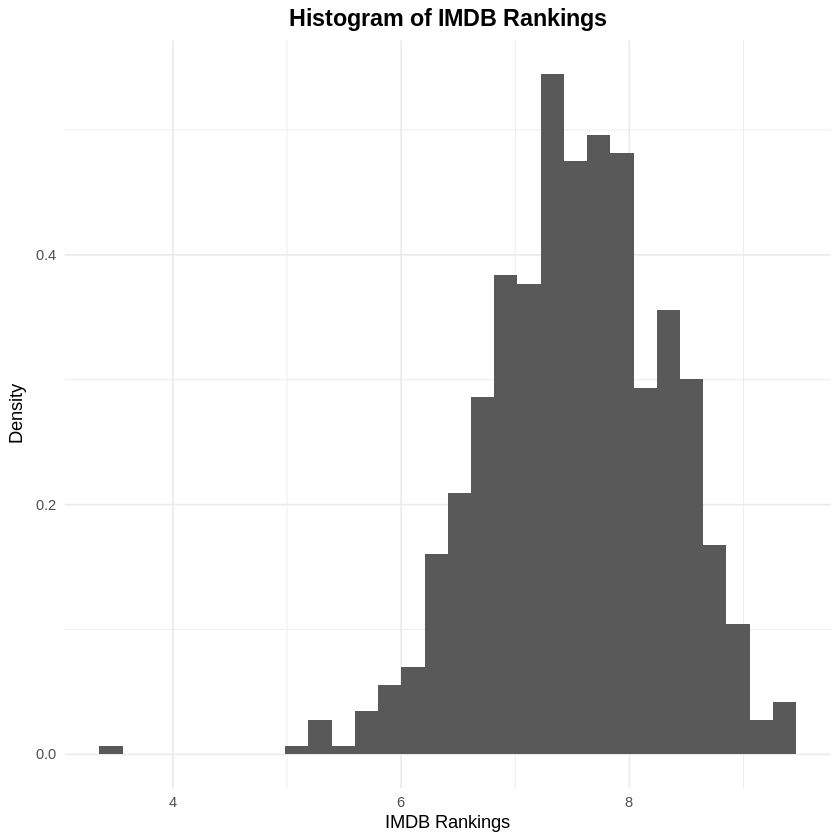

In [19]:
episodes %>%
  ggplot(aes(x = IMDB.Ranking)) +
  geom_histogram(aes(y = after_stat(density))) +
  labs(title = "Histogram of IMDB Rankings", x = "IMDB Rankings", y = "Density") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5))



---


Part 3: Create a Bar Chart showing the number of episodes for each Series. Discuss the results (3pts).

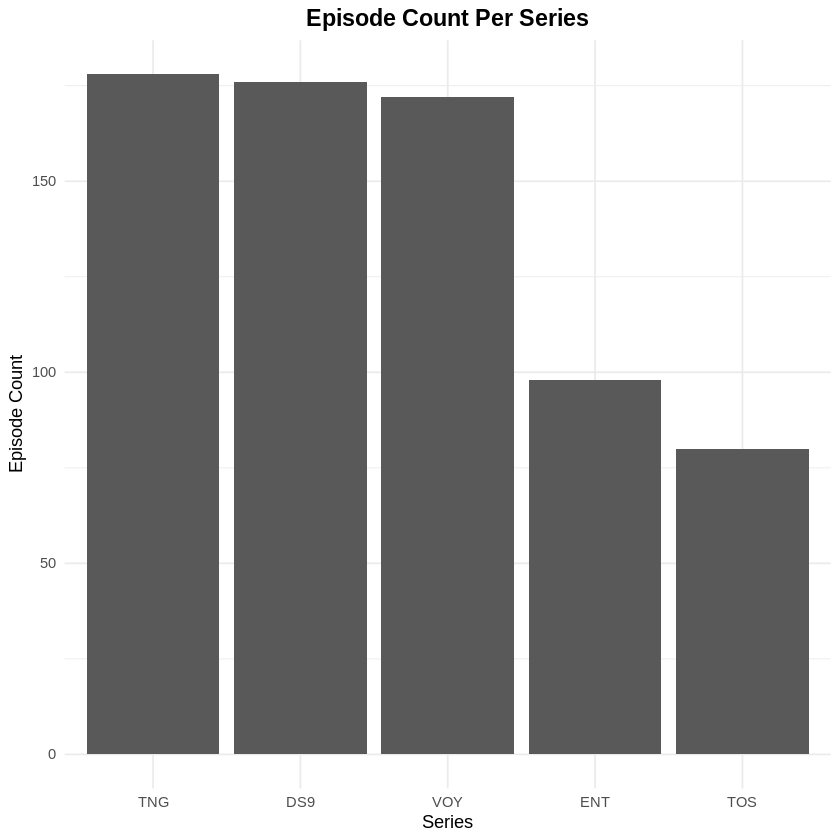

In [6]:
episodes %>%
  group_by(Series) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = reorder(Series, -Count))) +
  geom_bar(aes(y = Count), stat = "identity") +
  labs(title = "Episode Count Per Series", y = "Episode Count", x = "Series") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5))



---


Part 4: Create a series of boxplots comparing the IMDB rankings for episodes of Star Trek: The Next Generation for different seasons.  Discuss the results (3pts).

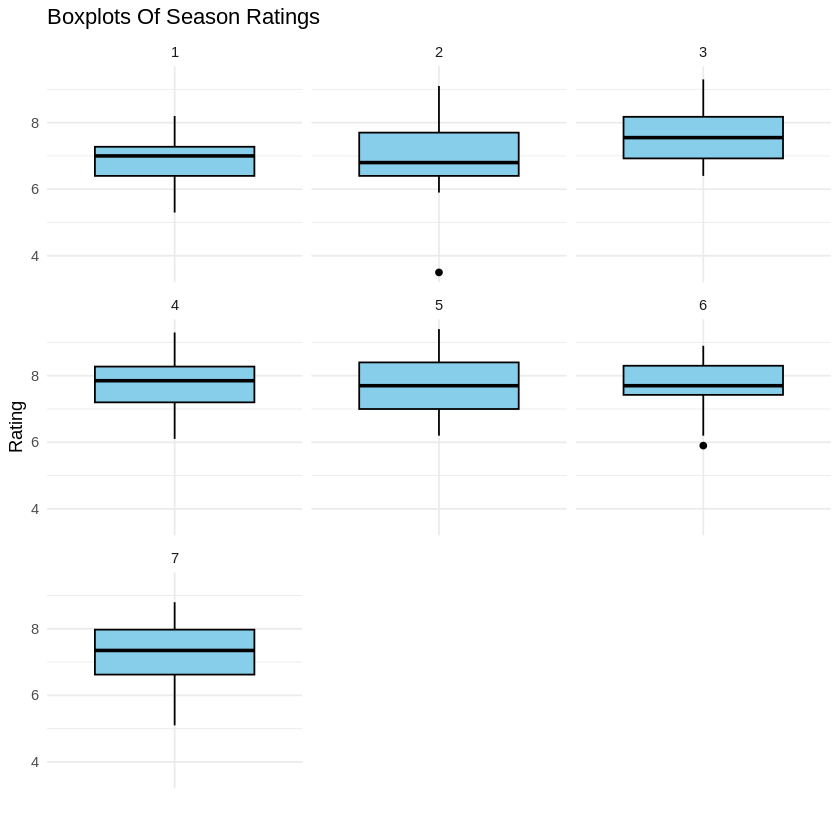

In [17]:
episodes %>%
  filter(Series.Name == "The Next Generation") %>%
  ggplot(aes( x = "", y = IMDB.Ranking)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  facet_wrap(~Season) +
  labs(title = "Boxplots Of Season Ratings", x = "", y = "Rating") +
  theme_minimal()


# Question 3

Part 1: For all 704 episodes of Star Trek, compute the standard deviation of their IMDB rankings using the definition of standard deviation and then compute an estimate of the standard deviation based on the range. Compare and discuss why there is a discrepancy in the results (note that the Histogram from 1b might provide some insight) (2pts).

In [8]:
episodes %>%
  summarise(
    SD = sd(IMDB.Ranking),
    estimatedSD = (max(IMDB.Ranking) - min(IMDB.Ranking))/4
  )


SD,estimatedSD
<dbl>,<dbl>
0.7760457,1.475


Part 2: For all 704 episodes of Star Trek, compute the mean and median of the IMDB rankings. Based on the histogram from Question 1b, what is a more appropriate estimate of centrality of the rankings? (2pts).

In [13]:
episodes %>%
  summarise(
    Mean = mean(IMDB.Ranking),
    Median = median(IMDB.Ranking)
  )

Mean,Median
<dbl>,<dbl>
7.55071,7.6


# Question 5


What proportion of Star Trek: The Next Generation episodes have an IMDB ranking above 7.0? If I select ten episodes of Star Trek: The Next Generation at random, what is the probability that I will see two or fewer episodes with am IMDB ranking above 7.0 (use R to compute this probability)?

In [9]:
episodes %>%
  filter(Series.Name == "The Next Generation") %>%
  mutate(greaterThan7 = ifelse(IMDB.Ranking > 7, 1, 0)) %>%
  summarise(
    Probability = pbinom(q = 2, size = 10, p = mean(greaterThan7), lower.tail = TRUE)
  )

Probability
<dbl>
0.005219139


# Question 6

An engineering team has been monitoring the reliability of a transporter system. Over a long mission, they observe that transporter malfunctions occur at an average rate of 0.5 per week. Assume the number of malfunctions over a fixed time period has a Poisson distribution. What is the probability that the transporter malfunctions no more than once over a 4 week period? (2pts)

# Dataset Information


You are now ready to get started working on the Problem Solving Task!

Here is some more information about the dataset:

**Data on Star Trek Series from 1966 through 2005**

**Description**

A data set containing data on 704 episodes of Star Trek aired between 1966 and 2005 including The Original Series, Star Trek: The Next Generation, Star Trek: Deep Space Nine, Star Trek: Voyager, and Enterprise (later titled Star Trek: Enterprise).


**Format**

A data frame with 704 rows and 55 variables:

Series

    Abbreviated series name: TOS,TNG,DS9,VOY,ENT

Series.Name

    The complete series name

Season

    Season number

Episode

    Episode number (within season)

IMDB.Ranking

    The IMDB User rating for the episode, on a scale of 1-10

Title

    Episode title

Star.date

    The epsiode's star date

Air.date

    The epsiode's original air date

Bechdel.Wallace.Test

    Indicator of whether or not an episode passed the Bechdel-Wallace Test

Director

    The name of the episode's director

Writer.1

    The name of the episode's first credited writer

Writer.2

    The name of the episode's second credited writer

Writer.3

    The name of the episode's third credited writer

Writer.4

    The name of the episode's fourth credited writer

Writer.5

    The name of the episode's fifth credited writer

Writer.6

    The name of the episode's sixth credited writer

Female.Director

    Indicator T/F if the episodes director is identified as female

Female.Writer.1

    Indicator T/F if the episodes first credited writer is identified as female

Female.Writer.1

    Indicator T/F if the episodes secomnd credited writer is identified as female

Female.Writer.1

    Indicator T/F if the episodes third credited writer is identified as female

Female.Writer.1

    Indicator T/F if the episodes fourth credited writer is identified as female

Female.Writer.1

    Indicator T/F if the episodes fifth credited writer is identified as female

Female.Writer.1

    Indicator T/F if the episodes sixth credited writer is identified as female

Executive.Producer.1

    The name of the first credited executive producer

Executive.Producer.2

    The name of the second credited executive producer

Executive.Producer.3

    The name of the third credited executive producer

Co.Executive.Producer.1

    The name of the first credited co-executive producer

Co.Executive.Producer.2

    The name of the second credited co-executive producer

Co.Executive.Producer.3

    The name of the third credited co-executive producer

Producer.1

    The name of the first credited producer

Producer.2

    The name of the second credited producer

Producer.3

    The name of the third credited producer

Producer.4

    The name of the fourth credited producer

Co.Producer.1

    The name of the first credited co-producer

Co.Producer.2

    The name of the second credited co-producer

Co.Producer.3

    The name of the third credited co-producer

Co.Producer.4

    The name of the fourth credited co-producer

Co.Producer.5

    The name of the fifth credited co-producer

Associate.Producer.1

    The name of the first credited associate producer

Associate.Producer.2

    The name of the second credited associate producer

Supervising.Producer.1

    The name of the first credited supervising producer

Supervising.Producer.2

    The name of the second credited supervising producer

Supervising.Producer.3

    The name of the third credited supervising producer

Co.Supervising.Producer.1

    The name of the first credited co-supervising producer

Co.Supervising.Producer.2

    The name of the second credited co-supervising producer

Coordinating.Producer

    The name of the coordinating producer

Consulting.Producer.1

    The name of the first credited consulting producer

Consulting.Producer.2

    The name of the second credited consulting producer

Female.Executive.Producer

    Indicator T/F if any of the episode's executive producers are identifed as female

Female.Co.Executive.Producer

    Indicator T/F if any of the episode's co-executive producers are identified as female

Female.Producer

    Indicator T/F if any of the episode's producers are identified as female

Female.Co.Producers

    Indicator T/F if any of the episode's co-producers are identified as female

Female.Associate.Producer

    Indicator T/F if any of the episode's associate producers are identified as female

Female.Supervising.Producer

    Indicator T/F if any of the episode's supervising producers are identified as female

Female.Co.Supervising.Producer

    Indicator T/F if any of the episode's co-supervising producers are identified as female

Female.Line.Producer

    Indicator T/F if any of the episode's line producers are identified as female

Source

https://www.themarysue.com/star-trek-bechdel-test/